# Naive bayes classifier: Google Play Store reviews

## 1. Data Loading

In [35]:
# Handle import up-front
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from utils import cross_val

### 1.1. Load the data

In [36]:
# Load the data from the URL provided in the project tutorial
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

### 1.2. Inspect the data

In [37]:
data_df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [38]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


### 1.3. Train-test split

In [39]:
# Separate features from labels
labels=data_df['polarity']
features=data_df.drop('polarity', axis=1)

# Split the data into training and testing features and labels
training_features, testing_features, training_labels, testing_labels=train_test_split(
    features,
    labels,
    test_size=0.25,
    random_state=315
)

### 1.4. Data encoding

In [40]:
# Get just the reviews from the training data
training_reviews=training_features['review']

# Fit the vectorizer and transform the training reviews into word counts
vec_model=CountVectorizer(stop_words="english")
training_word_counts=vec_model.fit_transform(training_reviews).toarray()

print(f'Word count matrix has {training_word_counts.shape[0]} rows and {training_word_counts.shape[1]} columns')

Word count matrix has 668 rows and 3151 columns


## 2. EDA

### 2.1. Baseline model performance

In [41]:
# Define the model
model=MultinomialNB()

# Cross-validate the model
scores=cross_val(model, training_word_counts, training_labels)

Cross-validation accuracy: 80.99 +/- 4.17%


### 2.2. Missing, and/or extreme values

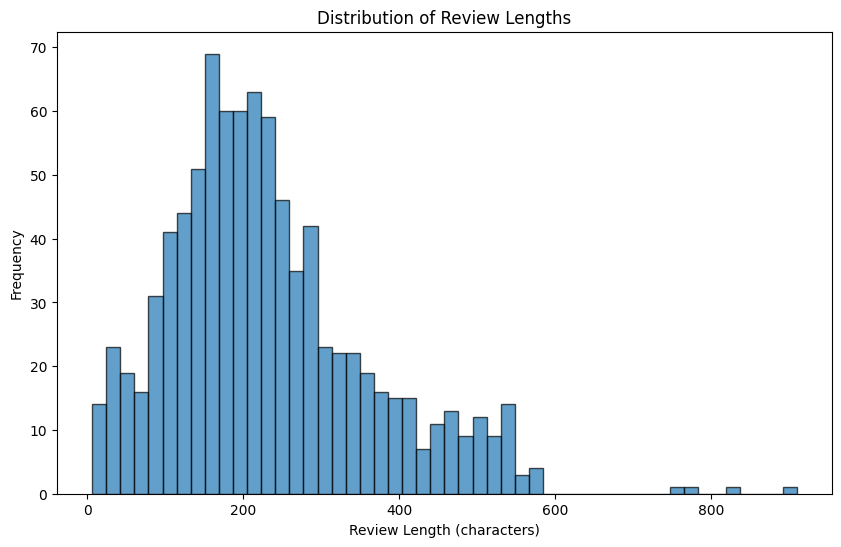

In [42]:
# Try plotting the distribution of review lengths!

# Your code here...
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the URL
data_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

# Calculate the length of each review
data_df['review_length'] = data_df['review'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(data_df['review_length'], bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (characters)")
plt.ylabel("Frequency")
plt.show()


### 2.3. Feature selection

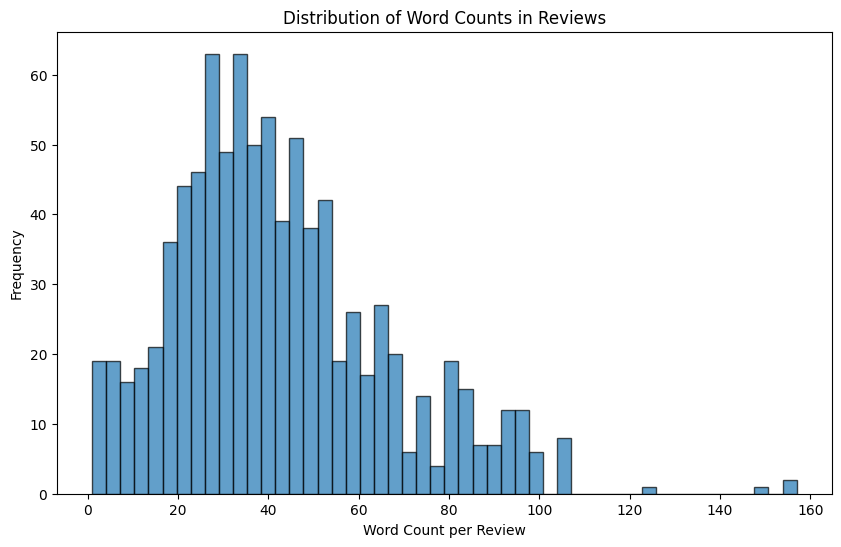

In [43]:
# After encoding we have over three thousand features - do we need all of them? Try plotting the distribution of word counts!
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

# Calculate the word count for each review
data_df['word_count'] = data_df['review'].apply(lambda x: len(x.split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(data_df['word_count'], bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribution of Word Counts in Reviews")
plt.xlabel("Word Count per Review")
plt.ylabel("Frequency")
plt.show()


# Your code here...

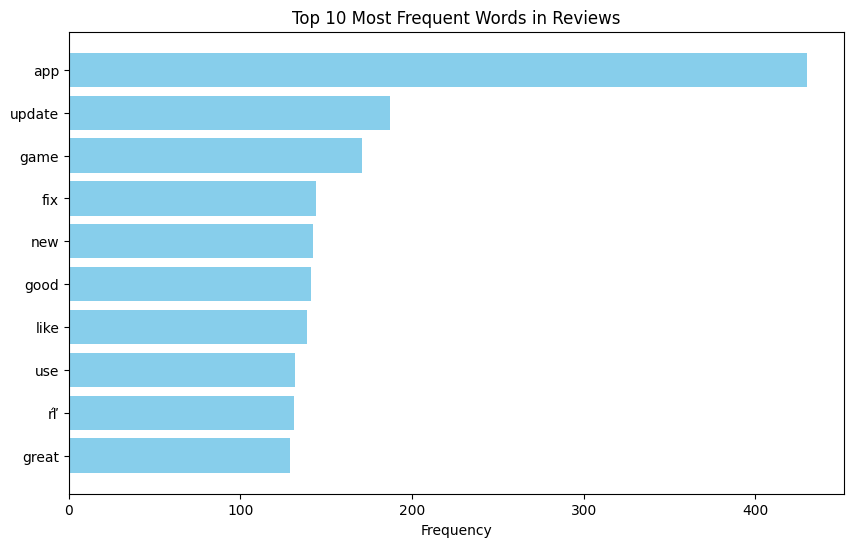

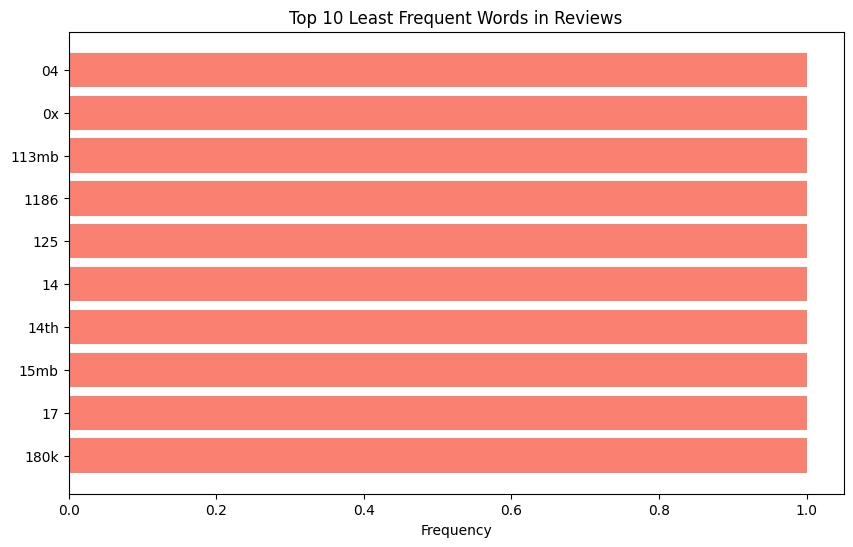

count    3721.000000
mean        4.862671
std        13.347132
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       430.000000
Name: count, dtype: float64

In [44]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the data
data_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

# Fit the CountVectorizer to obtain the word feature names and their frequencies
vec_model = CountVectorizer(stop_words="english")
word_counts = vec_model.fit_transform(data_df['review'])

# Sum the counts for each word across all reviews
word_count_totals = np.asarray(word_counts.sum(axis=0)).flatten()

# Create a DataFrame to store words and their corresponding total counts
words_df = pd.DataFrame({'word': vec_model.get_feature_names_out(), 'count': word_count_totals})

# Sort by highest and lowest counts
top_words = words_df.nlargest(10, 'count')
bottom_words = words_df.nsmallest(10, 'count')

# Visualize the top 10 most frequent words
plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['count'], color='skyblue')
plt.xlabel("Frequency")
plt.title("Top 10 Most Frequent Words in Reviews")
plt.gca().invert_yaxis()  # Highest frequency at the top
plt.show()

# Visualize the top 10 least frequent words
plt.figure(figsize=(10, 6))
plt.barh(bottom_words['word'], bottom_words['count'], color='salmon')
plt.xlabel("Frequency")
plt.title("Top 10 Least Frequent Words in Reviews")
plt.gca().invert_yaxis()
plt.show()

# Summary statistics of word frequencies
words_stats = words_df['count'].describe()
words_stats


In [45]:

vec_model = CountVectorizer(stop_words="english")
word_counts = vec_model.fit_transform(data_df['review'])

# Sum the counts for each word across all reviews
word_count_totals = np.asarray(word_counts.sum(axis=0)).flatten()

# Create a DataFrame to store words and their corresponding total counts
words_df = pd.DataFrame({'word': vec_model.get_feature_names_out(), 'count': word_count_totals})

# Identify the lowest frequency words
bottom_words = words_df.nsmallest(10, 'count')

# List of low-frequency words
low_frequency_words = bottom_words['word'].tolist()

# Filter out the low-frequency words from the words DataFrame
filtered_words_df = words_df[~words_df['word'].isin(low_frequency_words)]

# Confirm the results by displaying the filtered DataFrame's head and size
filtered_words_df.head(), filtered_words_df.shape


(  word  count
 0  000      2
 3   10     11
 4  100      4
 5  101      2
 6   11      2,
 (3711, 2))

In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score

# Load the data
data_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

# Fit the CountVectorizer to obtain the word feature matrix
vec_model = CountVectorizer(stop_words="english")
word_counts = vec_model.fit_transform(data_df['review'])

# Initialize each Naive Bayes model
gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()

# Training data (word counts) for Naive Bayes models
X = word_counts.toarray()  # Convert sparse matrix to array
y = data_df['polarity']

# Perform cross-validation for each model
gaussian_scores = cross_val_score(gaussian_nb, X, y, cv=5)
multinomial_scores = cross_val_score(multinomial_nb, X, y, cv=5)
bernoulli_scores = cross_val_score(bernoulli_nb, X, y, cv=5)

# Calculate and display average cross-validation score for each model
gaussian_avg = gaussian_scores.mean()
multinomial_avg = multinomial_scores.mean()
bernoulli_avg = bernoulli_scores.mean()

gaussian_avg, multinomial_avg, bernoulli_avg


(np.float64(0.6497959952294268),
 np.float64(0.6699704977716402),
 np.float64(0.6576297784194338))

In [47]:
model = MultinomialNB()
model.fit(training_word_counts, training_labels)


MultinomialNB()

## 3. Model training

In [48]:
# Your code here...
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid=params, cv=5)
grid_search.fit(training_word_counts, training_labels)

best_model = grid_search.best_estimator_
print(f"Best Alpha: {grid_search.best_params_['alpha']}")


Best Alpha: 2.0


In [49]:
# Ensure CountVectorizer is only fit on the training data
vec_model = CountVectorizer(stop_words="english")
training_word_counts = vec_model.fit_transform(training_reviews)

# Transform the test data using the fitted vectorizer
testing_word_counts = vec_model.transform(testing_features['review'])

# Use the best model from grid search to make predictions
predictions = best_model.predict(testing_word_counts)

# Evaluate the predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(testing_labels, predictions))
print(confusion_matrix(testing_labels, predictions))


              precision    recall  f1-score   support

           0       0.76      0.94      0.84       142
           1       0.82      0.49      0.62        81

    accuracy                           0.78       223
   macro avg       0.79      0.72      0.73       223
weighted avg       0.78      0.78      0.76       223

[[133   9]
 [ 41  40]]


## 5. Final model evaluation

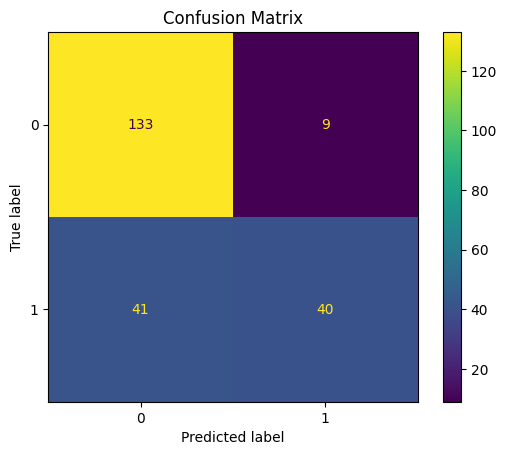

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(testing_labels, predictions)
plt.title("Confusion Matrix")
plt.show()


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Cross-validation with the MultinomialNB model
model = MultinomialNB(alpha=2.0)  # Use the best alpha found from GridSearch
scores = cross_val_score(model, training_word_counts, training_labels, cv=5, scoring='accuracy')

# Display cross-validation results
print(f"Cross-validation accuracy: {np.mean(scores) * 100:.2f}% ± {np.std(scores) * 100:.2f}%")


Cross-validation accuracy: 81.00% ± 3.52%


In [52]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.5, 1.0, 2.0, 5.0, 10.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(training_word_counts, training_labels)

best_model = grid_search.best_estimator_
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Best Cross-Validation Score: {grid_search.best_score_ * 100:.2f}%")


Best Alpha: 2.0
Best Cross-Validation Score: 81.00%


In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to get word counts
vec_model = CountVectorizer(stop_words="english")
training_word_counts = vec_model.fit_transform(training_features['review'])

# Sum the counts for each word across all reviews
word_count_totals = np.asarray(training_word_counts.sum(axis=0)).flatten()
words_df = pd.DataFrame({'word': vec_model.get_feature_names_out(), 'count': word_count_totals})

# Filter vocabulary to remove low-frequency words (e.g., count > 5)
filtered_words = words_df[words_df['count'] > 5]['word']

# Reinitialize CountVectorizer with the filtered vocabulary
vec_model_filtered = CountVectorizer(vocabulary=filtered_words, stop_words="english")

# Transform training and testing data with the filtered vectorizer
training_word_counts_filtered = vec_model_filtered.fit_transform(training_features['review'])
testing_word_counts_filtered = vec_model_filtered.transform(testing_features['review'])

# Confirm dimensions match
print(f"Training word count matrix: {training_word_counts_filtered.shape}")
print(f"Testing word count matrix: {testing_word_counts_filtered.shape}")



Training word count matrix: (668, 519)
Testing word count matrix: (223, 519)


In [54]:
from sklearn.feature_selection import SelectKBest, chi2

k_best_selector = SelectKBest(chi2, k=300)  # Select top 300 features
training_word_counts_reduced = k_best_selector.fit_transform(training_word_counts_filtered, training_labels)
testing_word_counts_reduced = k_best_selector.transform(testing_word_counts_filtered)


In [55]:
vec_model_filtered = CountVectorizer(stop_words="english", max_features=500)
training_word_counts_limited = vec_model_filtered.fit_transform(training_features['review'])
testing_word_counts_limited = vec_model_filtered.transform(testing_features['review'])


In [56]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(training_word_counts_reduced, training_labels)

best_model = grid_search.best_estimator_
print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Best Cross-Validation Score: {grid_search.best_score_ * 100:.2f}%")


Best Alpha: 0.5
Best Cross-Validation Score: 85.18%


In [57]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the test set
predictions = best_model.predict(testing_word_counts_reduced)

# Evaluate performance
print(classification_report(testing_labels, predictions))
print(confusion_matrix(testing_labels, predictions))


              precision    recall  f1-score   support

           0       0.81      0.84      0.82       142
           1       0.70      0.65      0.68        81

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223

[[119  23]
 [ 28  53]]


In [58]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
training_word_counts_balanced, training_labels_balanced = oversampler.fit_resample(training_word_counts_reduced, training_labels)

# Retrain the model
model_balanced = MultinomialNB(alpha=0.5)
model_balanced.fit(training_word_counts_balanced, training_labels_balanced)


MultinomialNB(alpha=0.5)

In [60]:
# Ensure the balanced model is trained
model_balanced.fit(training_word_counts_balanced, training_labels_balanced)

# Generate predictions on the test set
predictions_balanced = model_balanced.predict(testing_word_counts_reduced)

# Evaluate the balanced model
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(testing_labels, predictions_balanced))
print(confusion_matrix(testing_labels, predictions_balanced))


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       142
           1       0.68      0.69      0.69        81

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223

[[116  26]
 [ 25  56]]


In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_balanced, training_word_counts_balanced, training_labels_balanced, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean() * 100:.2f}% ± {scores.std() * 100:.2f}%")


Cross-Validation Accuracy: 87.90% ± 2.82%


In [62]:
# Predict on the test set
predictions_balanced = model_balanced.predict(testing_word_counts_reduced)

# Evaluate the performance
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(testing_labels, predictions_balanced))
print("Confusion Matrix:")
print(confusion_matrix(testing_labels, predictions_balanced))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       142
           1       0.68      0.69      0.69        81

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223

Confusion Matrix:
[[116  26]
 [ 25  56]]


The model is getting better with cross validation, unfortunately there seems still to be some error.